<a href="https://colab.research.google.com/github/rat145/pw_assignments/blob/main/EDA_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

# Flight price dataset

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the ataset have?

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/flight_price.xlsx")
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df.shape

(10683, 11)

Observation:
- The Dataset has 10683 rows and 11 columns.

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


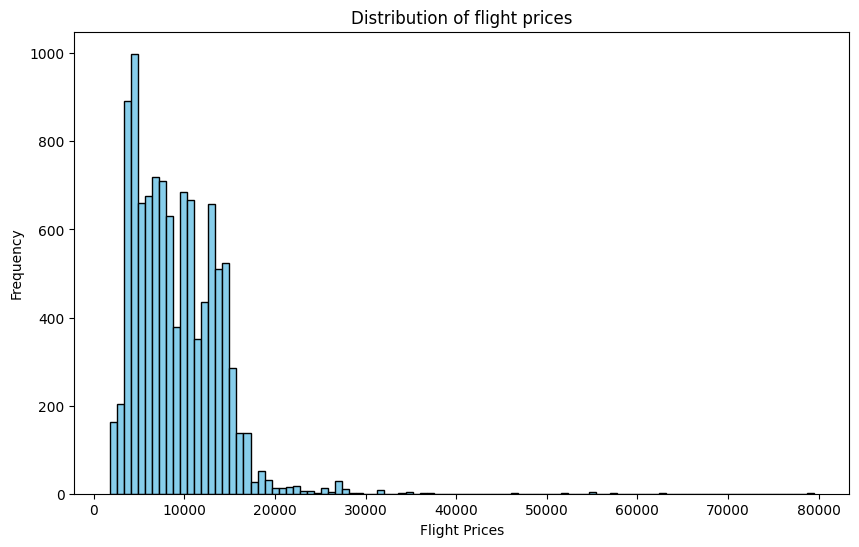

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(x=df["Price"], bins=100, edgecolor="black", color="skyblue")
plt.xlabel("Flight Prices")
plt.ylabel("Frequency")
plt.title("Distribution of flight prices")
plt.show()

Observation:
- The flight prices are strongly right skewed.

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [ ]:
print(f"Minimum flight price: {df['Price'].min()}")
print(f"Maximum flight price: {df['Price'].max()}")
print(f"Range: {df['Price'].max() - df['Price'].min()}")

Minimum flight price: 1759
Maximum flight price: 79512
Range: 77753


Observation:
- The flight prices range from 1759 to 79512.

### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [ ]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [ ]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

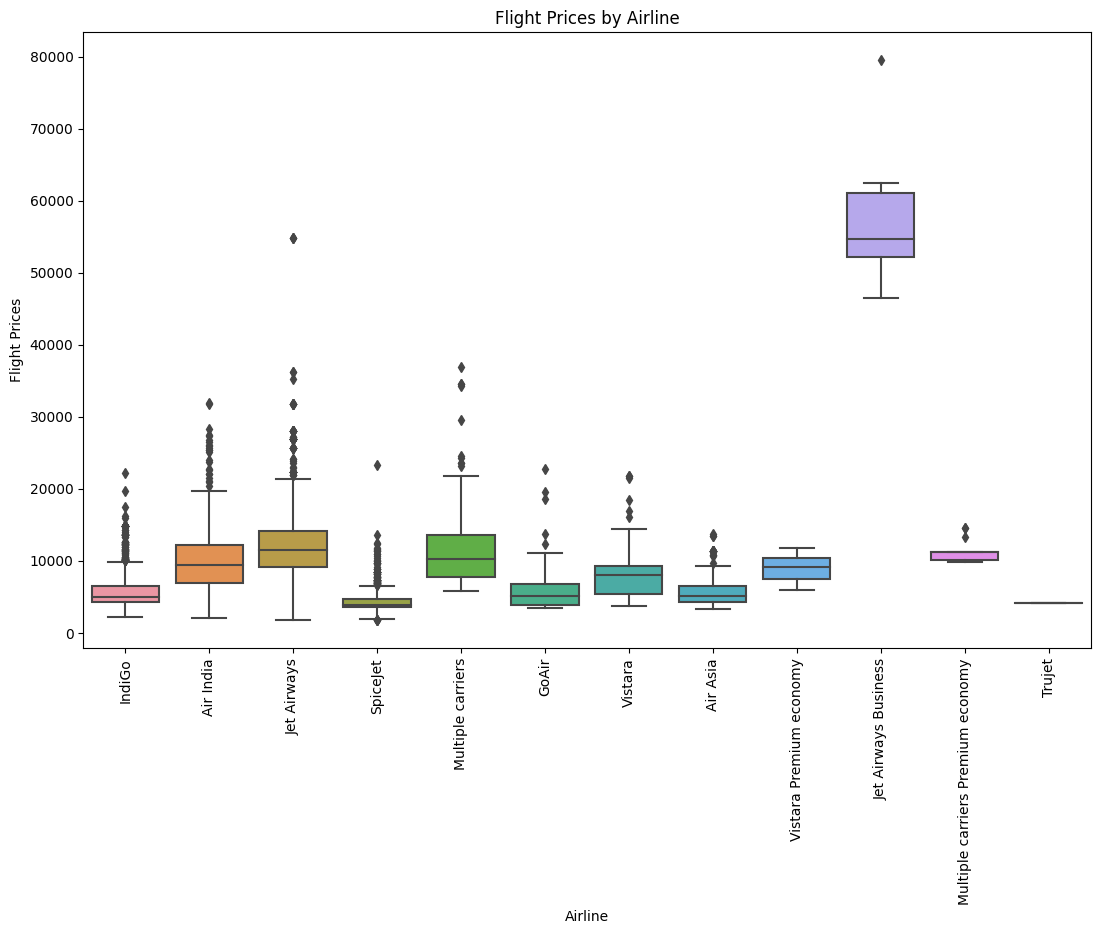

In [ ]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df, x="Airline", y="Price")
plt.xlabel("Airline")
plt.ylabel("Flight Prices")
plt.title("Flight Prices by Airline")
plt.xticks(rotation=90)
plt.show()

Observation:
- Jet Airways Business has the most expensive flight prices followed by Jet Airways.
- Spicejet and Trujet have the lowest prices.

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

Observation:
- Yes there are outliers in the dataset for example the in the above boxplot.
- We can address them in  following ways:
  - Investigating the source and nature of outliers.
  - Considering their potential impact on your analysis.
  - Applying data transformation techniques (e.g., winsorization, log transformation) to mitigate the impact of outliers.
  - Removing or filtering out extreme values if they are errors or anomalies.

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [ ]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [ ]:
# we can use date of journey feature here. lets clean that data.
df["Date_of_Journey"].isnull().sum()

0

In [ ]:
df["Date_of_Journey"].nunique()

44

In [ ]:
df.duplicated().sum()

220

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(10463, 11)

In [ ]:
df["Date_of_Journey"].info()

<class 'pandas.core.series.Series'>
Int64Index: 10463 entries, 0 to 10682
Series name: Date_of_Journey
Non-Null Count  Dtype 
--------------  ----- 
10463 non-null  object
dtypes: object(1)
memory usage: 163.5+ KB


In [ ]:
df["day_of_journey"] = df["Date_of_Journey"].str.split("/").str[0]
df["month_of_journey"] = df["Date_of_Journey"].str.split("/").str[1]
df["year_of_journey"] = df["Date_of_Journey"].str.split("/").str[2]
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [ ]:
df.drop(columns=["Date_of_Journey"], axis=1, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [ ]:
df.drop(columns=["Route"], axis=1, inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10463 non-null  object
 1   Source            10463 non-null  object
 2   Destination       10463 non-null  object
 3   Dep_Time          10463 non-null  object
 4   Arrival_Time      10463 non-null  object
 5   Duration          10463 non-null  object
 6   Total_Stops       10462 non-null  object
 7   Additional_Info   10463 non-null  object
 8   Price             10463 non-null  int64 
 9   day_of_journey    10463 non-null  object
 10  month_of_journey  10463 non-null  object
 11  year_of_journey   10463 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.0+ MB


In [ ]:
df["day_of_journey"] = df["day_of_journey"].astype(int)
df["month_of_journey"] = df["month_of_journey"].astype(int)
df["year_of_journey"] = df["year_of_journey"].astype(int)

In [ ]:
# lets make a new columns with seasons (determined according to month)
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
def get_seasons(month):
  i = month
  if i>=3 and i<6:
    return "summer"
  elif i>=6 and i<=9:
    return "monsoon"
  else:
    return "winter"

In [ ]:
df["Season"] = df["month_of_journey"].apply(get_seasons)

In [ ]:
df["Season"].unique()

array(['summer', 'monsoon'], dtype=object)

In [ ]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Season
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,summer
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,summer
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,monsoon
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,summer
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,summer


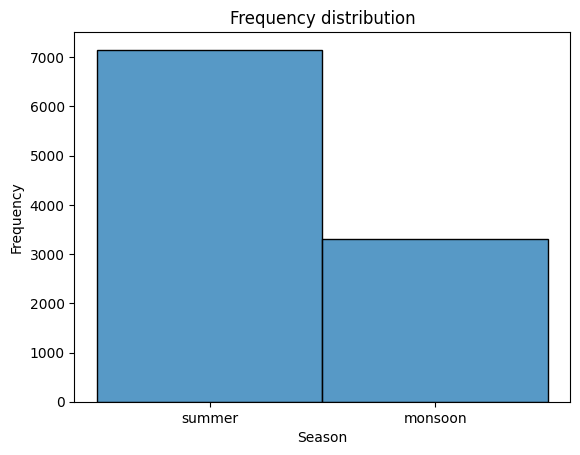

In [ ]:
# This means we only have data of summer and monsoon
sns.histplot(df["Season"], edgecolor="black")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.title("Frequency distribution")
plt.show()

Observations:
- Peak travel season is summer.
- More than half of the flights were in summer.

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [ ]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Season
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,summer
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,summer


In [ ]:
average_monthly_prices = df.groupby(["month_of_journey", "year_of_journey"])["Price"].mean().reset_index()
average_monthly_prices

,month_of_journey,year_of_journey,Price
0,3,2019,10695.397311
1,4,2019,5766.545455
2,5,2019,9028.783569
3,6,2019,8736.152522


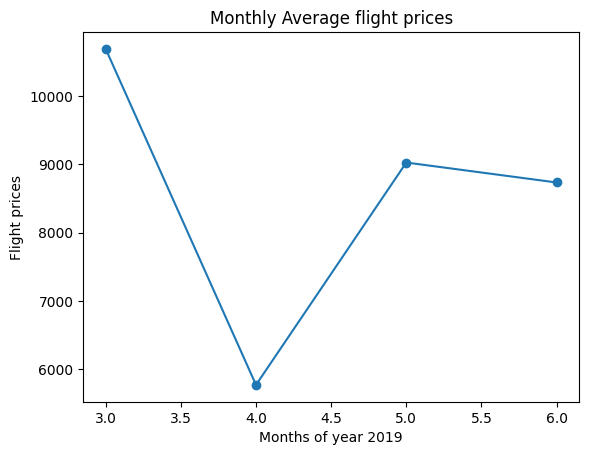

In [ ]:
plt.plot(average_monthly_prices["month_of_journey"], average_monthly_prices["Price"], marker='o', linestyle='-')
plt.xlabel("Months of year 2019")
plt.ylabel("Flight prices")
plt.title("Monthly Average flight prices")
plt.show()

Observation:
- We can say that the flight prices were at peak (above 10000) in the month of March.
- The prices dropped to its lowest (below 6000) in the month of April.
- Since April it rose upto 9000 and has been following sideways trend with no major changes.

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

I will use duration feature, since the more the duration is, the more farther is the destination. It can help us analyze flight prices with respect to the duration. So lets clean up the duration feature, and create separate columns for hour and minute.

In [ ]:
df["Duration"].isnull().sum()

0

In [ ]:
df["Duration"].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [ ]:
df["duration_hr"] = df["Duration"].str.split().str[0].str.split("h").str[0]

In [ ]:
df["duration_min"] = df["Duration"].str.split().str[1].str.split("m").str[0]

In [ ]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Season,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,summer,2,50
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,summer,7,25
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,monsoon,19,NaN
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,summer,5,25
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,summer,4,45


In [ ]:
df["duration_hr"].isnull().sum()

0

In [ ]:
df["duration_min"].isnull().sum()

1006

In [ ]:
df["duration_min"].fillna(0, inplace=True)

In [ ]:
df["duration_min"].isnull().sum()

0

In [ ]:
# we can now drop the duration column
df.drop(columns=["Duration"], axis=1, inplace=True)

In [ ]:
df["duration_hr"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [ ]:
df[df["duration_hr"]=="5m"]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Season,duration_hr,duration_min
6474,Air India,Mumbai,Hyderabad,16:50,16:55,2 stops,No info,17327,6,3,2019,summer,5m,0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Season,duration_hr,duration_min
0,0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,summer,2,50
1,1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,1,5,2019,summer,7,25
2,2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,monsoon,19,0
3,3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,12,5,2019,summer,5,25
4,4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,1,3,2019,summer,4,45


In [ ]:
df.drop(columns=["index"], axis=1, inplace=True)

In [ ]:
df[df["duration_hr"]=="5m"]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Season,duration_hr,duration_min
6397,Air India,Mumbai,Hyderabad,16:50,16:55,2 stops,No info,17327,6,3,2019,summer,5m,0


In [ ]:
df.iat[6397, 12] = "0"
df.iat[6397, 13] = "5"

In [ ]:
df[6397:6398]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Season,duration_hr,duration_min
6397,Air India,Mumbai,Hyderabad,16:50,16:55,2 stops,No info,17327,6,3,2019,summer,0,5


In [ ]:
df["duration_min"].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [ ]:
df["duration_hr"] = df["duration_hr"].astype(int)
df["duration_min"] = df["duration_min"].astype(int)

In [ ]:
# now lets compare if duration affects the flight prices using visualization

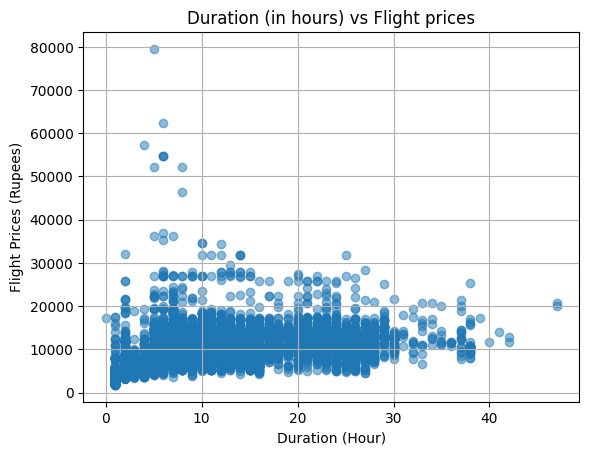

In [ ]:
plt.scatter(x=df["duration_hr"], y=df["Price"], alpha=0.5)
plt.xlabel("Duration (Hour)")
plt.ylabel("Flight Prices (Rupees)")
plt.title("Duration (in hours) vs Flight prices")
plt.grid(True)
plt.show()

Observation:
- There has been no effect of duration flight duration on flight prices.
- Prices have been fluctuating in the same range along the X-axis which suggests duration has little to no effect on the flight prices.

In [ ]:
# Lets see if total stops feature has any effect on prices.

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'day_of_journey',
       'month_of_journey', 'year_of_journey', 'Season', 'duration_hr',
       'duration_min'],
      dtype='object')

In [ ]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
# we will use label encoding on this feature

In [ ]:
df["Total_Stops"].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [ ]:
df["Total_Stops"] = df["Total_Stops"].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [ ]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

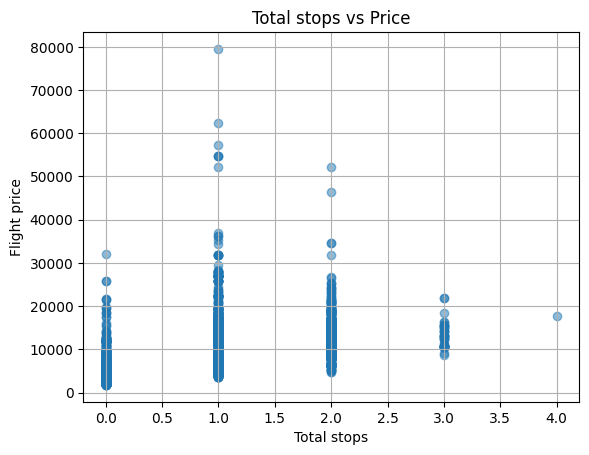

In [ ]:
plt.scatter(x=df["Total_Stops"], y=df["Price"], alpha=0.5)
plt.xlabel("Total stops")
plt.ylabel("Flight price")
plt.title("Total stops vs Price")
plt.grid(True)
plt.show()

Observation:
- Again, it is hard to say total no. of stops has effect on the prices.
- Flights with 1 stop has highest prices but they decrease as number of stop increases. It doesn't seem to play any role in the fluctuations of price.

In [ ]:
# Now, we will see according to Airlines

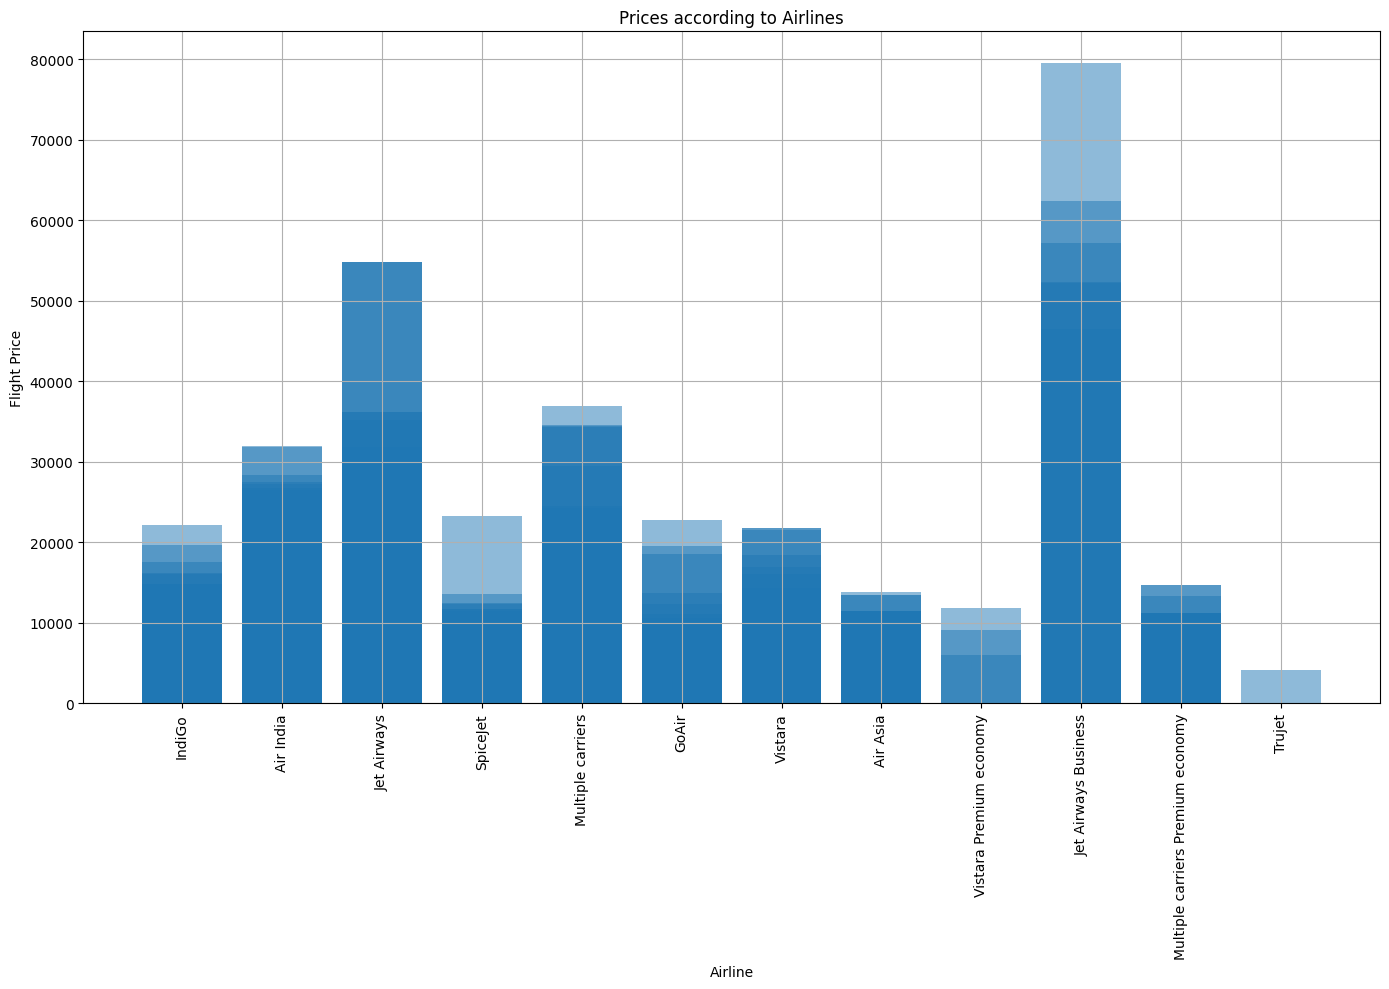

In [ ]:
plt.figure(figsize=(14,10))
plt.bar(x=df["Airline"], height=df["Price"], alpha=0.5)
plt.xlabel("Airline")
plt.ylabel("Flight Price")
plt.grid(True)
plt.title("Prices according to Airlines")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:
- Finally we can conclude that Airlines affect the flight prices majorly.
- Trujet, GoAir, Indigo and Spicejet are economy class offer affordable prices.
- While Jet Airways Business and Jet Airways seem to have the highest prices of flight. They cater to more premium services.

===================================================================================================================

# Play Store Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

Observation:
- It has 10841 rows and 13 columns

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
df[df["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
df.drop(10472, axis=0, inplace=True)

In [8]:
df[df["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [9]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [10]:
df["Rating"].isnull().sum()

1474

In [11]:
df.dropna(subset = ["Rating"], inplace=True)

In [12]:
df.shape

(9366, 13)

In [13]:
df["Rating"].isnull().sum()

0

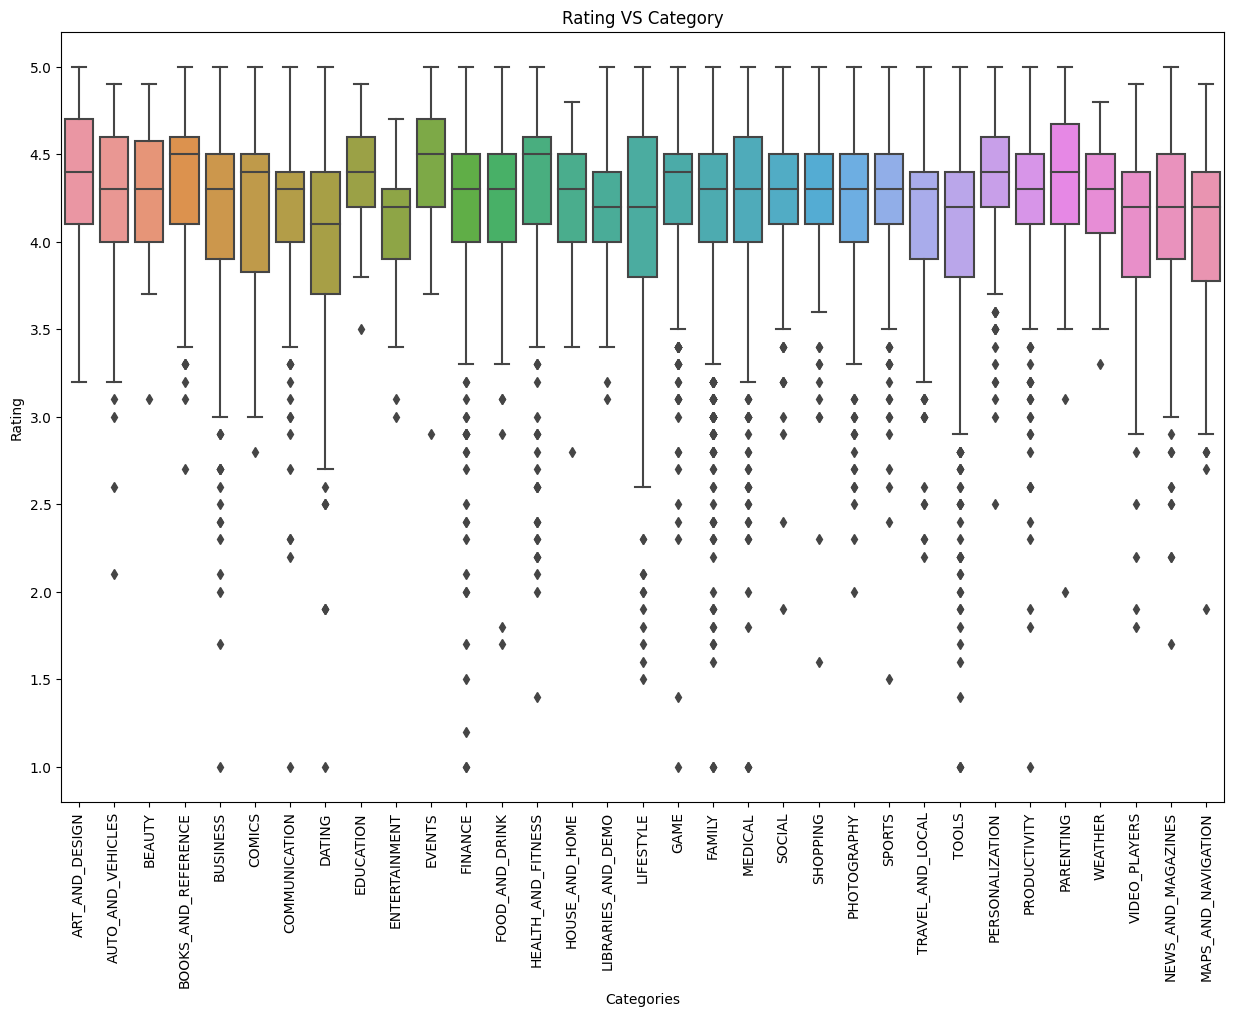

In [14]:
# lets plot the graph
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="Category", y="Rating")
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Rating")
plt.title("Rating VS Category")
plt.show()

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [15]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

Observation:
- Yes, there are 4 null values in the current version column and 2 null values in the android version column.
- They are less likely to impact the analysis unless we have to analyze something that involves these features.

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [16]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [17]:
df["Size"].info()

<class 'pandas.core.series.Series'>
Int64Index: 9366 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
9366 non-null   object
dtypes: object(1)
memory usage: 146.3+ KB


In [18]:
df["Rating"].info()

<class 'pandas.core.series.Series'>
Int64Index: 9366 entries, 0 to 10840
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
9366 non-null   float64
dtypes: float64(1)
memory usage: 146.3 KB


In [19]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [20]:
df["Size"] = df["Size"].replace("Varies with device",np.nan)

In [21]:
df.dropna(subset=["Size"], inplace=True)

In [22]:
def convert_to_kb(size):
  if 'M' in size:
    return float(size.split('M')[0])*1000
  elif 'k' in size:
    return float(size.replace("k",""))
  else:
    return None

In [23]:
df["Size"] = df["Size"].apply(convert_to_kb)

In [24]:
df["Size"].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+03, 5.50e+03, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03,
       9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04, 9.40e+03, 1.50e+04,
       1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04,
       5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03,
       8.60e+03, 2.40e+03, 2.70e+04, 2.50e+03, 7.00e+03, 1.60e+04,
       3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04, 3.20e+04,
       5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03, 9.80e+03,
       5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03, 7.10e+03,
       2.20e+04, 6.40e+03, 3.20e+03, 8.20e+03, 4.90e+03, 9.50e+03,
       5.00e+03, 5.90e+03, 1.30e+04, 7.30e+04, 6.80e+03, 3.50e+03,
       4.00e+03, 2.30e+03, 2.10e+03, 4.20e+04, 9.10e+03, 5.50e+04,
       2.30e+01, 7.30e+03, 6.50e+03, 1.50e+03, 7.50e+03, 5.10e

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
df.rename(columns={"Size": "Size_kb"}, inplace=True)
df.head(2)

,App,Category,Rating,Reviews,Size_kb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


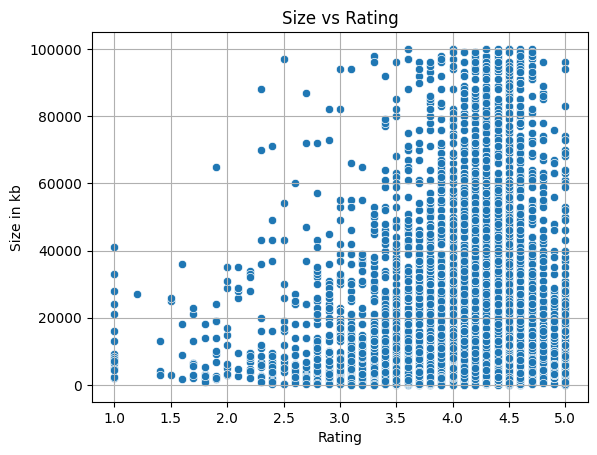

In [27]:
sns.scatterplot(data=df, x="Rating", y="Size_kb")
plt.xlabel("Rating")
plt.ylabel("Size in kb")
plt.title("Size vs Rating")
plt.grid(True)
plt.show()

Observation:
- The graph is left skewed.
- The ratings of the apps are increasing as the size increases.

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [28]:
df.head(2)

,App,Category,Rating,Reviews,Size_kb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [29]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [30]:
df["Type"].isnull().sum()

0

In [45]:
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [46]:
def convert_price_dtype(price_str):
  if price_str.startswith("$"):
    return float(price_str[1:])
  else:
    return 0.0

In [47]:
df["Price"] = df["Price"].apply(convert_price_dtype)

In [50]:
df["Price"].dtype

dtype('float64')

In [54]:
df["Price"].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

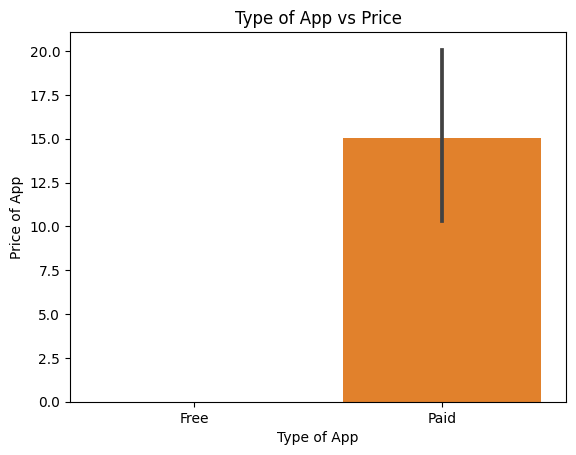

In [55]:
sns.barplot(data=df, x="Type", y="Price")
plt.title("Type of App vs Price")
plt.xlabel("Type of App")
plt.ylabel("Price of App")
plt.show()

Observation:
- Free apps cost 0.
- Paid apps are greater than $0.

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [56]:
df.head()

,App,Category,Rating,Reviews,Size_kb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [57]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [61]:
df["Installs"] = df["Installs"].str.replace(",","")
df["Installs"] = df["Installs"].str.replace("+","")

In [63]:
df["Installs"] = df["Installs"].astype(int)

In [64]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

In [65]:
apps_install_freq = df.groupby("App")["Installs"].max().reset_index()

In [66]:
apps_install_freq

,App,Installs
0,+Download 4 Instagram Twitter,1000000
1,- Free Comics - Comic Apps,10000
2,.R,10000
3,/u/app,10000
4,058.ba,100
...,...,...
7024,감성학원 BL 첫사랑,10000
7025,💎 I'm rich,10000
7026,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000
7027,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000


In [67]:
apps_install_freq.sort_values(by="Installs", ascending=False, inplace=True)

In [70]:
top_10_apps = apps_install_freq.head(10)
top_10_apps

,App,Installs
3523,Google News,1000000000
5894,Subway Surfers,1000000000
1687,Candy Crush Saga,500000000
6926,imo free video calls and chat,500000000
6344,UC Browser - Fast Download Private & Secure,500000000
5563,Samsung Health,500000000
6078,Temple Run 2,500000000
5168,Pou,500000000
2517,Dropbox,500000000
5522,SHAREit - Transfer & Share,500000000


In [72]:
top_10_apps["index_col"] = range(1,11)
top_10_apps.set_index("index_col", inplace=True)
top_10_apps

,App,Installs
index_col,,
1,Google News,1000000000
2,Subway Surfers,1000000000
3,Candy Crush Saga,500000000
4,imo free video calls and chat,500000000
5,UC Browser - Fast Download Private & Secure,500000000
6,Samsung Health,500000000
7,Temple Run 2,500000000
8,Pou,500000000
9,Dropbox,500000000


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

To help the company identify the most popular app categories for launching a new app on the Google Play Store, you can follow these steps and analyze specific features of the dataset:

1. **Data Collection:** Start by acquiring the Google Play Store dataset, which includes information about various apps available on the platform. This dataset can typically be obtained from various sources, including public datasets or web scraping.

2. **Data Exploration:** Before making recommendations, explore the dataset to understand its structure and contents. Use basic data exploration techniques to gain insights into the data.

3. **Cleaning and Preprocessing:** Clean the dataset by handling missing values, duplicates, and outliers. Preprocess the data to ensure it is in a suitable format for analysis.

4. **Feature Selection:** Identify the key features that are relevant to the task of identifying popular app categories. Important features to consider include:
   - `Category`: The category of the app (e.g., "Games," "Productivity," "Entertainment").
   - `Installs`: The number of installs for each app.
   - `Rating`: The user ratings for each app.
   - `Reviews`: The number of user reviews for each app.
   - `Price`: The price of the app (if it's a paid app).
   - `Content Rating`: The content rating of the app (e.g., "Everyone," "Teen," "Mature 17+").

5. **Popularity Metrics:** Define a metric for app popularity. You can use the number of installs, user ratings, or a combination of both as a measure of popularity. You might want to normalize or scale these metrics to make them comparable.

6. **Grouping and Aggregation:** Group the data by app category and calculate popularity metrics for each category. For example, calculate the average number of installs or ratings for apps in each category.

7. **Visualization:** Create visualizations such as bar charts or heatmaps to display the popularity of app categories based on the chosen metric(s).

8. **Analysis and Recommendations:** Analyze the results to identify the most popular app categories. Consider the following factors when making recommendations to the company:
   - Categories with high average installs or ratings.
   - Categories with a significant number of apps.
   - Trends in app popularity over time (if available).
   - Competition in each category.

9. **Further Analysis:** Consider conducting additional analyses, such as sentiment analysis of user reviews or competitive analysis within specific categories, to provide more insights.

10. **Presentation:** Present your findings and recommendations to the company in a clear and understandable manner, using visualizations and data-driven insights.

By following these steps and analyzing relevant features in the dataset, you can provide valuable recommendations to the company regarding the most popular app categories for their new app launch on the Google Play Store.

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers using the Google Play Store dataset, you can analyze various features and use data visualizations to present your findings effectively. Here's a structured approach:

**Features to Analyze:**

1. **Developer/Publisher Name:** This is the primary feature to analyze. Group the data by developer/publisher name to identify which developers have the most apps on the platform.

2. **Number of Apps:** Calculate the total number of apps each developer has published on the Google Play Store. This provides an overview of their activity and presence on the platform.

3. **Average App Ratings:** Calculate the average user ratings for each developer's apps. This metric helps identify developers with consistently high-quality apps.

4. **Total Installs:** Sum the total installs of all apps by each developer. This shows the cumulative popularity of their apps.

5. **Reviews:** Analyze the total number of user reviews for each developer's apps. More reviews can indicate higher user engagement.

6. **Category Distribution:** Break down the developer's apps by category to see in which categories they are most active and successful.

7. **Content Rating:** Analyze the content rating of the apps. It can help identify developers catering to specific user demographics.

**Data Visualizations:**

1. **Bar Chart:** Create a bar chart showing the top developers by the number of apps published. This helps identify the most prolific developers.

2. **Pie Chart:** Use a pie chart to visualize the distribution of a developer's apps across different categories. This provides insights into their specialization.

3. **Scatter Plot:** Create a scatter plot with average app ratings on one axis and the total number of installs on the other. Each point represents a developer, and this chart helps identify developers with high ratings and a large user base.

4. **Heatmap:** Use a heatmap to show the correlation between the number of apps, total installs, and average ratings for each developer. This can reveal patterns of success.

5. **Stacked Bar Chart:** Create a stacked bar chart to show the distribution of app categories for each developer. It illustrates their diversification or specialization.

6. **Word Cloud:** Generate a word cloud to visualize the most common words in app names or descriptions by a particular developer. This can give insights into their branding and app themes.

7. **Time Series Plot:** If the dataset includes timestamps, use a time series plot to analyze the growth in the number of apps or installs over time for specific developers.

8. **Box Plot:** Create box plots to visualize the distribution of average ratings, installs, or reviews for each developer, helping to identify outliers and trends.

**Analysis and Recommendations:**

- Identify the top developers based on various criteria, such as the number of apps, average ratings, total installs, or user reviews.
- Consider the developer's specialization in specific app categories and their ability to maintain high-quality ratings.
- Provide recommendations to the app development company based on the analysis, such as potential collaborations or acquisitions of successful developers.
- Offer insights into emerging developers who show promise and trends in the mobile app market.

By analyzing these features and presenting the findings through data visualizations, the app development company can make informed decisions about collaborating with or learning from successful app developers in the Google Play Store ecosystem.

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To help a marketing research firm identify the best time to launch a new app using the Google Play Store dataset, you can analyze various features and use data visualizations to present your findings effectively. Here's a structured approach:

**Features to Analyze:**

1. **Release Date:** Analyze the release date of apps to identify trends in app launches. Look for patterns related to the day of the week, month, or year when successful apps are often released.

2. **Category:** Explore how the timing of app releases varies across different app categories. Some categories might have seasonal trends.

3. **Popularity Metrics:** Consider metrics like app installs, user ratings, and user reviews. Identify whether there are specific periods when app launches tend to be more successful in terms of user engagement and installs.

4. **Competition:** Analyze the number of apps released by other developers during specific time periods. High competition might affect the visibility of a new app.

5. **Content Updates:** Check if there's a correlation between app updates and increased popularity. Frequent updates may attract more users.

6. **Price Changes:** Investigate whether temporary price reductions or promotions coincide with spikes in installs or user engagement.

**Data Visualizations:**

1. **Line Chart:** Create a line chart showing the number of app releases over time. You can use a rolling average to smooth out fluctuations and identify trends.

2. **Bar Chart:** Create a bar chart to visualize the average number of installs or user ratings for apps released in different months or days of the week. This helps identify which time periods are associated with higher user engagement.

3. **Heatmap:** Use a heatmap to show the distribution of app releases across months and days of the week. It can reveal patterns and hotspots for app launches.

4. **Time Series Plot:** If the dataset includes timestamps, use a time series plot to analyze the growth in the number of app releases, installs, or user ratings over time.

5. **Box Plot:** Create box plots to visualize the distribution of app installs or user ratings for different months or days of the week. This can help identify outliers and trends.

6. **Stacked Bar Chart:** Visualize the distribution of app releases across categories for different time periods. It can highlight seasonal trends in specific app categories.

**Analysis and Recommendations:**

- Identify patterns and trends in app releases, installs, and user engagement over time.
- Determine if certain months or days of the week are associated with higher app success.
- Consider the competition in different time periods and whether launching during less competitive times is beneficial.
- Analyze whether content updates or pricing strategies affect app popularity.
- Provide recommendations to the marketing research firm on the optimal time to launch the new app based on the analysis.

By analyzing these features and presenting the findings through data visualizations, the marketing research firm can make informed recommendations on the best time to launch their new app for maximum visibility and user engagement in the Google Play Store ecosystem.